In [ ]:
args = {'log_to_file': False,
 'verbose': False,
 'autoencoder': 'temporal',
 'save_model': False,
 'tensorboard': False,
 'encoder': 'vanilla_tcn',
 'multiscale': False,
 'causal_encoder': False,
 'hierarchical': False,
 'hz': 0,
 'viewing_time': -1,
 'signal_type': 'pos',
 'slice_time_windows': None,
 'augment': False,
 'loss_type': '',
 'use_validation_set': False,
 'cuda': True,
 'rec_loss': 'mse',
 'batch_size': 64,
 'epochs': 200,
 'learning_rate': 0.0005,
 'model_pos': 'pos-i3738',
 'model_vel': 'vel-i8528',
 'pca_components': 0,
 'save_tsne_plot': True,
 'cv_folds': 5,
 'generate': False,
 'task': ''}
from argparse import Namespace
args = Namespace(**args)

In [ ]:
import sys
sys.path.append('./gazemae/gazemae')
from settings import *
from network import ModelManager
model = ModelManager(args, training=False)

In [ ]:
from read_data import Subject
sub0 = Subject('1003_3')
data0, fr0 = sub0.readTrialData('Moviestillimage_1.jpg', vel=True)
sub1 = Subject('1003_2')
data1, fr1 = sub1.readTrialData('Moviestillimage_1.jpg', vel=True)


In [ ]:
from read_data import Subject
sub = Subject('1003_3')
sub.extractFixations('Moviestillimage_8.jpg')



In [ ]:
a = [d.split('\t')[0] for d in sub.fixations[0][2]]
b = [d.split('\t')[0] for d in sub.fixations[0][1]]
print(len(a), len(b))

In [ ]:
from read_data import SaliencyTrace
st = SaliencyTrace()
# st.readAllFixations('Moviestillimage_8.jpg')
st.computeFixationTraceForAll('Freeviewingstillimage_17.jpg')

In [ ]:
from read_data import Subject
sub = Subject('1003_3')
fixations = sub.extractFixations('Moviestillimage_12.jpg')


In [ ]:
sub.trial_numeric[0].split('\t')[0]

In [ ]:
from read_data import FixationAnalyzer
fa =FixationAnalyzer('Freeviewingstillimage_16.jpg')
fa.compute_metrics()

In [ ]:
import pickle as pkl 
f =open('avg_fixation.pkl', 'wb')
pkl.dump(st.avg_fixations, f)
f.close()

In [ ]:
from read_data import SaliencyTrace
st =SaliencyTrace()
st.computeFixationTraceForAll('Moviestillimage_12.jpg')

In [ ]:
%run read

In [ ]:
from read_data import Subject
sub = Subject('2003_1')
fix_all = sub.extractFixations('Freeviewingstillimage_16.jpg')

In [ ]:
sub.trial

In [ ]:
a = [d.rstrip() for d in open('ttest_trace_avg.txt')]

In [ ]:
a = [d.rstrip() for d in open('ttest_trace_avg.txt')]

trial_names = [d[:d.index(' Ttest')] for d in a]
stats = [float(d[d.index('statistic'):-1].split(',')[0][len('statistic='):]) for d in a]
pvalues = [float(d[d.index('statistic'):-1].split(',')[1][len(' pvalue='):]) for d in a]

In [ ]:
d[d.index(' Ttest')

In [ ]:
from matplotlib import pyplot as plt
# plt.scatter(range(1, len(stats)+1), pvalues)
# plt.ylabel('pvalues')
# plt.title('plot of pvalues for ttest on avg of the trace')
# plt.grid()
# plt.savefig('pvalues_trace_Avg.png', dpi=300)
plt.bar(trial_names, pvalues)

In [ ]:
[name for pvalue, name in zip(pvalues, trial_names) if pvalue < 0.01]

In [ ]:
avg_stats = {name: [stat, pvalue] for name, stat, pvalue in zip(trial_names, stats, pvalues)}

In [ ]:
import pickle as pkl 
avg_stats_all = pkl.load(open('avg_fixation_stats_all_trials.pkl', 'rb'))

In [ ]:
for trial, stat in avg_stats.items():
    avg_stats_all[trial]['avg_saliency'] = stat

In [ ]:
f = open('stats_all_trials_latency_saliency.pkl', 'wb')
pkl.dump(avg_stats_all, f)
f.close()

In [ ]:
significance = ['Trial_name', 'avg_saliency', 'latency_first_fixation', 'saliency_first_fixation', 'saliency_longest_fixation'\
    , 'latency_longest_fixation', 'latency_maximum_saliency']
pv = 0.01
for trial, stats in avg_stats_all.items():
    significance.append([trial, stats['avg_saliency'][1]<pv, stats['latency_first_fixation'][1]<pv,\
        stats['saliency_first_fixation'][1]<pv, stats['saliency_longest_fixation'][1]<pv, stats['latency_longest_fixation'][1]<pv,\
        stats['latency_maximum_saliency'][1]<pv])

Freeviewingstillimage_1.jpg
Freeviewingstillimage_1.jpg_0
Freeviewingstillimage_1.jpg_90
Freeviewingstillimage_1.jpg_by
Freeviewingstillimage_1.jpg_color
Freeviewingstillimage_1.jpg_edges
Freeviewingstillimage_1.jpg_intensity
Freeviewingstillimage_1.jpg_object
Freeviewingstillimage_1.jpg_orientation
Freeviewingstillimage_1.jpg_rg
Freeviewingstillimage_1.jpg_grad
Freeviewingstillimage_1.jpg_0
Freeviewingstillimage_1.jpg_90
Freeviewingstillimage_1.jpg_by
Freeviewingstillimage_1.jpg_color
Freeviewingstillimage_1.jpg_edges
Freeviewingstillimage_1.jpg_intensity
Freeviewingstillimage_1.jpg_object
Freeviewingstillimage_1.jpg_orientation
Freeviewingstillimage_1.jpg_rg
Freeviewingstillimage_1.jpg_grad
Freeviewingstillimage_1.jpg_0
Freeviewingstillimage_1.jpg_90
Freeviewingstillimage_1.jpg_by
Freeviewingstillimage_1.jpg_color
Freeviewingstillimage_1.jpg_edges
Freeviewingstillimage_1.jpg_intensity
Freeviewingstillimage_1.jpg_object
Freeviewingstillimage_1.jpg_orientation
Freeviewingstillimage_1.j

100%|██████████| 10/10 [00:48<00:00,  4.89s/it]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

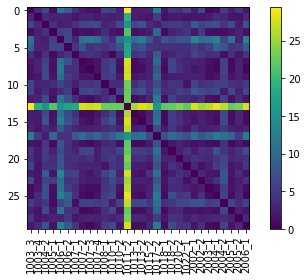

In [2]:
from read_data import SaliencyTrace 
st  = SaliencyTrace()
st.computeDistance('Freeviewingstillimage_1.jpg')

In [2]:
[d.rstrip().split(' ')[0] for d in open('ttest_trace_avg_smaps.txt')]

['Freeviewingstillimage_1_0',
 'Freeviewingstillimage_1_90',
 'Freeviewingstillimage_1_by',
 'Freeviewingstillimage_1_color',
 'Freeviewingstillimage_1_edges',
 'Freeviewingstillimage_1_intensity',
 'Freeviewingstillimage_1_object',
 'Freeviewingstillimage_1_orientation',
 'Freeviewingstillimage_1_rg',
 'Freeviewingstillimage_1_grad',
 'Freeviewingstillimage_1_0',
 'Freeviewingstillimage_1_90',
 'Freeviewingstillimage_1_by',
 'Freeviewingstillimage_1_color',
 'Freeviewingstillimage_1_edges',
 'Freeviewingstillimage_1_intensity',
 'Freeviewingstillimage_1_object',
 'Freeviewingstillimage_1_orientation',
 'Freeviewingstillimage_1_rg',
 'Freeviewingstillimage_1_grad',
 'Freeviewingstillimage_1_0',
 'Freeviewingstillimage_1_90',
 'Freeviewingstillimage_1_by',
 'Freeviewingstillimage_1_color',
 'Freeviewingstillimage_1_edges',
 'Freeviewingstillimage_1_intensity',
 'Freeviewingstillimage_1_object',
 'Freeviewingstillimage_1_orientation',
 'Freeviewingstillimage_1_rg',
 'Freeviewingstillimag